In [129]:
import pandas as pd

In [130]:
import numpy as np

In [131]:
import chardet

In [132]:
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

In [133]:
df = pd.read_csv('spam.csv', encoding=result['encoding'])

In [134]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [135]:
df.shape

(5572, 5)

In [136]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [137]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [138]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [139]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [140]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [141]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [143]:
df.sample(3)

,label,sms
2238,ham,Think you sent the text to the home phone. Tha...
3390,ham,"I'm in a meeting, call me later at"
229,ham,Dear good morning now only i am up


In [144]:
#assigning the labels as binary e.x ham as 0 and spam as 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [145]:
df['label'] = encoder.fit_transform(df['label'])

In [146]:
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
df.duplicated().sum()

403

In [148]:
df = df.drop_duplicates(keep='first')

In [149]:
df.duplicated().sum()

0

## EDA

In [151]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [152]:
#data is imbalanced
#analysis based on the no. characters,words and sentences used 
import nltk

In [153]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
df = df.copy()
df['num_alpha'] = df['sms'].apply(len)

In [155]:
df.head()

,label,sms,num_alpha
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [156]:
#number of words in sms
df = df.copy()
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [157]:
df.head()

,label,sms,num_alpha,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [158]:
#number of sentences
df = df.copy()
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [159]:
df.head()

,label,sms,num_alpha,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [160]:
df[['num_alpha','num_words','num_sentences']].describe()

,num_alpha,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [161]:
#summary of ham msgs
df[df['label']== 0][['num_alpha','num_words','num_sentences']].describe()

,num_alpha,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [162]:
#summary of spam msgs
df[df['label']== 1][['num_alpha','num_words','num_sentences']].describe()

,num_alpha,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Data Preprocessing
We will create a function that will do following functions and make our analysis easier
Lowercase conversion,
Tokenize,
Remove special characters,
removing stopwords and punctuations and
stem the sentences.


In [164]:
import string

In [165]:
from nltk.corpus import stopwords

In [166]:
def usable_sms(sms):
    # converting in lowercase
    sms = sms.lower()
    sms = nltk.word_tokenize(sms)

    #removing special characters
    temp = []
    for i in sms:
        if i.isalnum():
            temp.append(i)
            
    # removing stopwords and punctuation marks
    sms = temp[:]
    temp.clear()
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    sms = temp[:]
    temp.clear()

    for i in sms:
        temp.append(ps.stem(i))
        
    #finally returning a string
    return " ".join(temp)
        

In [167]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [169]:
df = df.copy()
df['transformed_sms'] = df['sms'].apply(usable_sms)

In [170]:
df.head()

,label,sms,num_alpha,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [171]:
#analysising the most common words in spam and ham messages
spam_words = []
ham_words = []
for MSG in df[df['label']==1]['transformed_sms'].tolist():
    for word in MSG.split():
        spam_words.append(word)
for MSG in df[df['label']==0]['transformed_sms'].tolist():
    for word in MSG.split():
        ham_words.append(word)

In [172]:
#analysing the freuencies of words
from collections import Counter

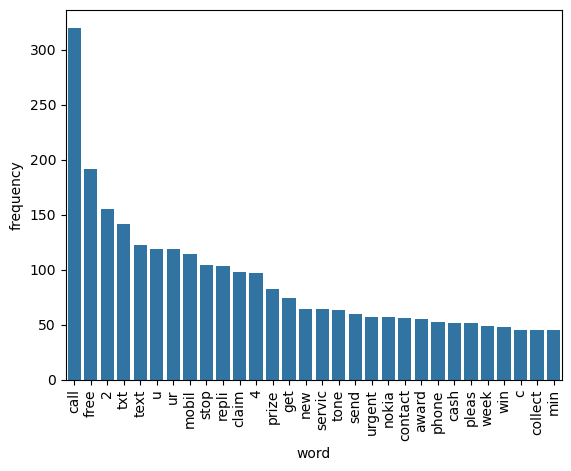

In [173]:
#plotting of frequencies vs words

#for spam words
import seaborn as sns 
import matplotlib.pyplot as plt
spam_word_counts = Counter(spam_words).most_common(30)
spam_word_df = pd.DataFrame(spam_word_counts, columns=['word', 'frequency'])

sns.barplot(x='word', y='frequency', data=spam_word_df)
plt.xticks(rotation='vertical')
plt.show()

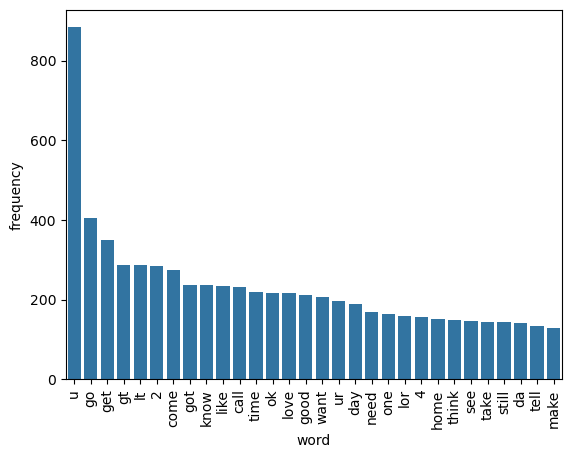

In [174]:
#for ham words

ham_word_counts = Counter(ham_words).most_common(30)
ham_word_df = pd.DataFrame(ham_word_counts, columns=['word', 'frequency'])

sns.barplot(x='word', y='frequency', data=ham_word_df)
plt.xticks(rotation='vertical')
plt.show()

## Model Building


In [176]:
# Data preprocessing(Converting transformed_sms into vectors(Vectorization))
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [177]:
X = tfidf.fit_transform(df['transformed_sms']).toarray()

In [178]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [179]:
y = df['label'].values

In [180]:
#Model building
from sklearn.model_selection import train_test_split


In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [183]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
knc = KNeighborsClassifier()

In [184]:
from sklearn.metrics import accuracy_score,precision_score

In [185]:
algos = {
    'MNB' : mnb,
    'BNB' : bnb,
    'GNB' : gnb,
    'KNC' : knc
}
accuracy_scores = []
precision_scores = []

#function for training the classifier
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision
    
for head,clf in algos.items():
    curr_accuracy,curr_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)
    
performance_df = pd.DataFrame({'Algorithm':algos.keys(),'Accuracy' : accuracy_scores,'Precision':precision_scores})

In [186]:
performance_df.sort_values(by='Precision', ascending=False, inplace=True)

In [187]:
performance_df

,Algorithm,Accuracy,Precision
0,MNB,0.959381,1.000000
3,KNC,0.900387,1.000000
1,BNB,0.970019,0.973451
2,GNB,0.876209,0.523148


In [188]:
import pickle

In [189]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('preferred_model.pkl','wb'))